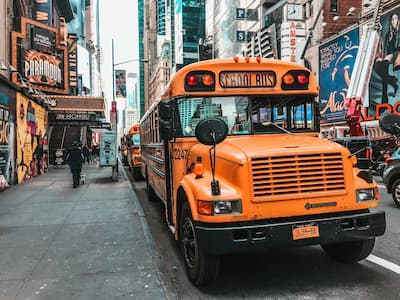

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [25]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("/Users/dani/Data Science/Projects/DataCamp Projects/Exploring NYC Public School Test Result Scores/datasets/schools.csv")

# Preview the data
schools.head()
display(schools)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


In [26]:
# function to classify features
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool', 'category']: 
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else: 
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else: 
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [27]:
categorical, non_categorical, discrete, continuous = classify_features(schools)

print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['borough']
Non-Categorical Features: ['school_name', 'building_code']
Discrete Features: []
Continuous Features: ['average_math', 'average_reading', 'average_writing', 'percent_tested']


In [28]:
for i in categorical:
    #print(i, ':')
    print(schools[i].value_counts())
    print()

borough
Brooklyn         109
Bronx             98
Manhattan         89
Queens            69
Staten Island     10
Name: count, dtype: int64



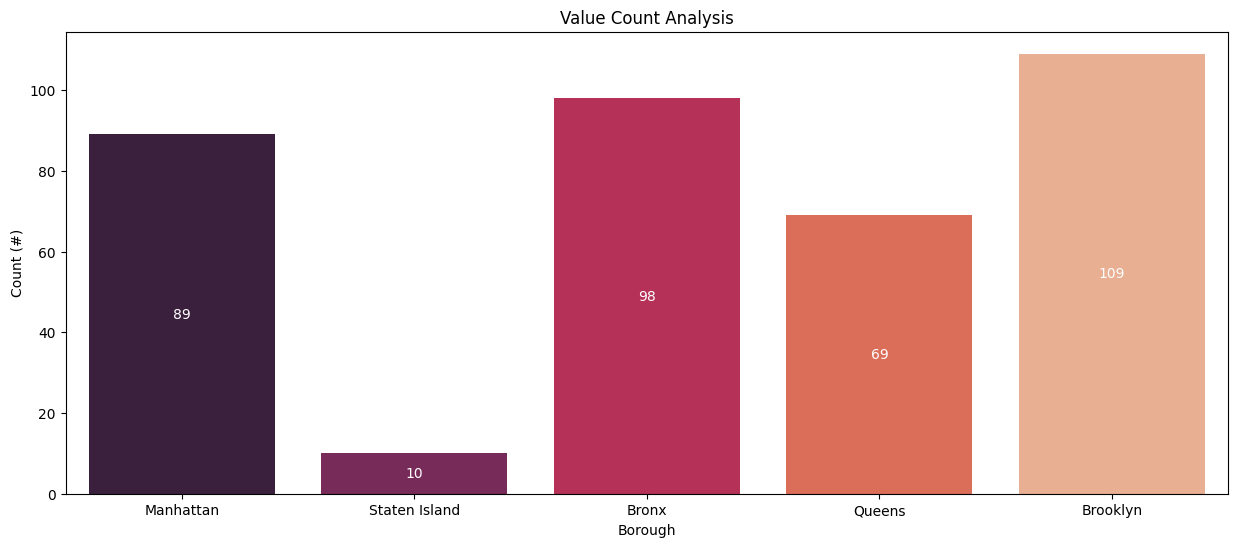

In [29]:
for i in categorical:
    fig, ax = plt.subplots(figsize=(15, 6))
    g = sns.countplot(x=i, data=schools, palette='rocket', hue=i, ax=ax, legend=None)
    plt.xticks(rotation = None)
    for c in ax.containers:
        labels = [f'{round((v.get_height())):,}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='white')
    g.set_title('Value Count Analysis')
    g.set_ylabel('Count (#)')
    g.set_xlabel('Borough')
    plt.show()

Create a pandas DataFrame called best_math_schools containing the "school_name" and "average_math" score for all schools where the results are at least 80% of the maximum possible score, sorted by "average_math" in descending order.

In [30]:
max_score = int(800 * .80)
best_math_schools = schools.query('average_math >= @max_score')[['school_name', 'average_math']].sort_values('average_math', ascending=False)
display(best_math_schools)

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


Identify the top 10 performing schools based on scores across the three SAT sections, storing as a pandas DataFrame called top_10_schools containing the school name and a column named "total_SAT", with results sorted by total_SAT in descending order.

In [31]:
schools['total_SAT'] = schools.apply(lambda x: sum( x[['average_math','average_reading','average_writing']] ), axis=1)

top_10_schools = schools.groupby("school_name", as_index=False)["total_SAT"].mean().sort_values("total_SAT", ascending=False).head(10)
display(top_10_schools)

,school_name,total_SAT
325,Stuyvesant High School,2144.0
324,Staten Island Technical High School,2041.0
55,Bronx High School of Science,2041.0
188,High School of American Studies at Lehman College,2013.0
334,Townsend Harris High School,1981.0
293,Queens High School for the Sciences at York Co...,1947.0
30,Bard High School Early College,1914.0
83,Brooklyn Technical High School,1896.0
121,Eleanor Roosevelt High School,1889.0
180,"High School for Mathematics, Science, and Engi...",1889.0


Locate the NYC borough with the largest standard deviation for "total_SAT", storing as a DataFrame called largest_std_dev with "borough" as the index and three columns: "num_schools" for the number of schools in the borough, "average_SAT" for the mean of "total_SAT", and "std_SAT" for the standard deviation of "total_SAT". Round all numeric values to two decimal places.

In [32]:
borough_df = schools.groupby('borough')['total_SAT'].agg(['count','mean','std'])

max_std = max(borough_df['std'])
largest_std_dev = borough_df.query('std == @max_std')

largest_std_dev = round(largest_std_dev.rename(columns={"count":"num_schools", "mean":"average_SAT", "std":"std_SAT"}),2)

display(largest_std_dev)

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
